In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [39]:
# load the dataset
fertilizer = pd.read_csv("fertilizer_reco.csv")
fertilizer.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [40]:
fertilizer.shape

(99, 9)

In [41]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [42]:
fertilizer.isnull().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [43]:
# check the duplicated values in the dataset
fertilizer.duplicated().sum()

np.int64(0)

In [44]:
# check the basic statistics of the dataset
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [45]:
fertilizer_numeric = fertilizer.select_dtypes(include=[np.number])
corr = fertilizer_numeric.corr()
corr

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


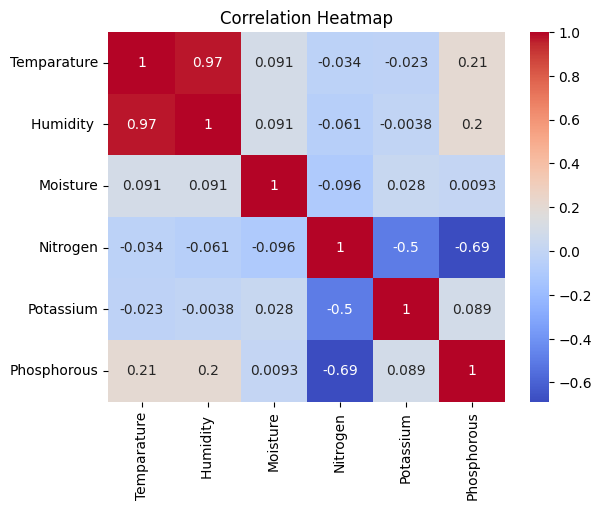

In [46]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [47]:
fertilizer['Fertilizer Name'].value_counts()

,count
Fertilizer Name,
Urea,22
DAP,18
28-28,17
14-35-14,14
20-20,14
17-17-17,7
10-26-26,7


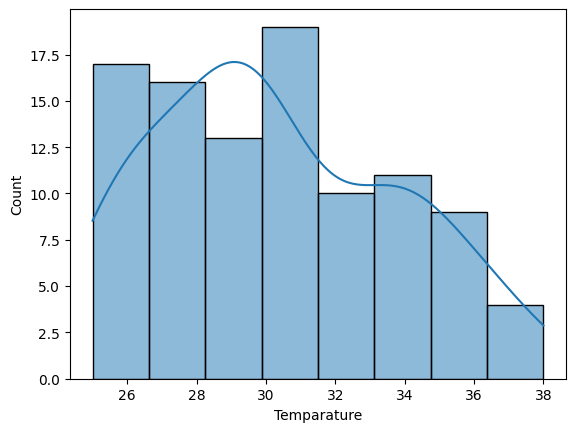

In [48]:
sns.histplot(fertilizer['Temparature'], kde=True)
plt.show()

In [49]:
features = fertilizer.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


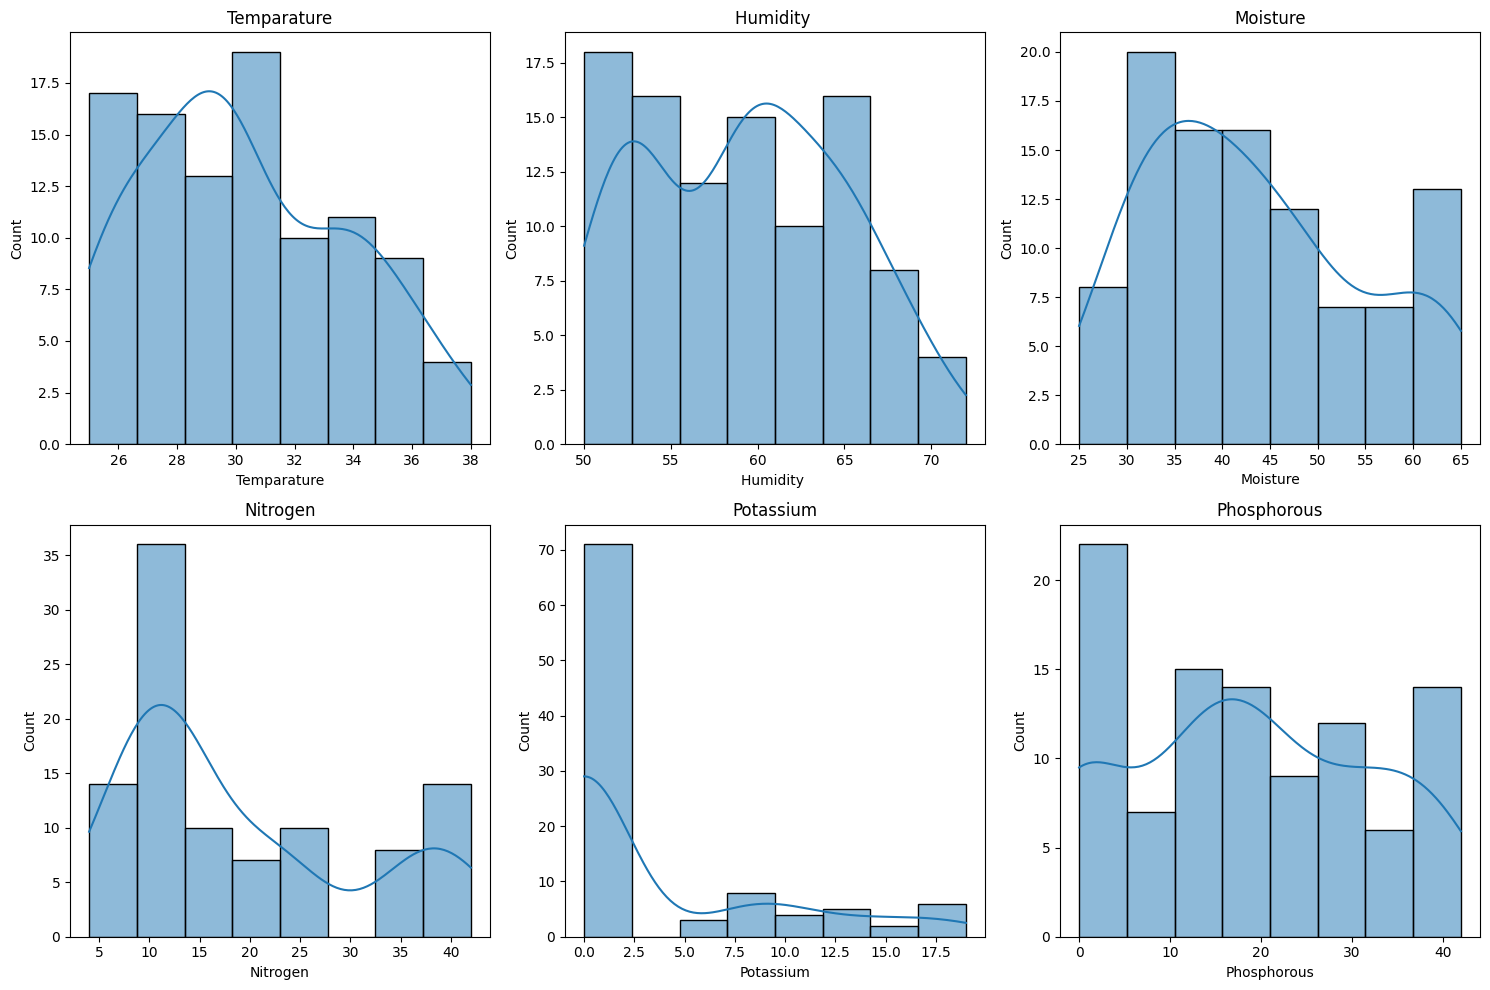

In [50]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

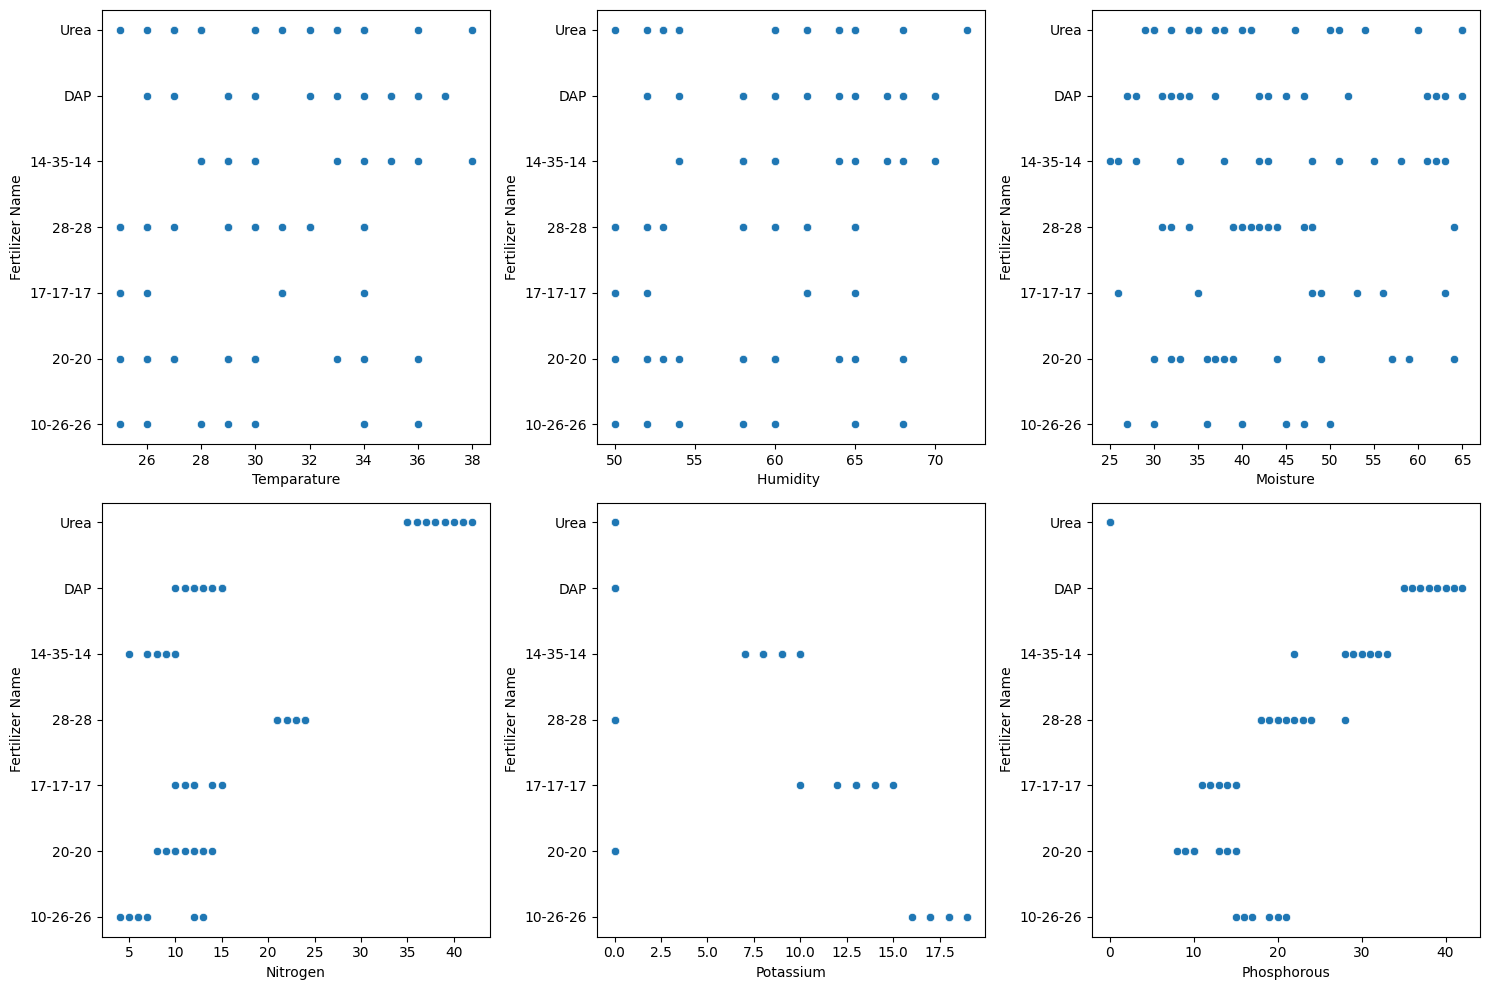

In [51]:
# plot scatter plot of each feature against the target
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Fertilizer Name', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()

In [52]:
fert_dict = {
'Urea':1,
'DAP':2,
'14-35-14':3,
'28-28':4,
'17-17-17':5,
'20-20':6,
'10-26-26':7,
}

In [53]:
fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

In [54]:
fertilizer['fert_no'].value_counts()

,count
fert_no,
1,22
2,18
4,17
3,14
6,14
5,7
7,7


In [55]:
# drop the target column with name and keep the target column with numbers
fertilizer.drop('Fertilizer Name',axis=1,inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [56]:
fertilizer.select_dtypes(include=['object']).columns

Index(['Soil Type', 'Crop Type'], dtype='object')

In [57]:
lb = LabelEncoder()
fertilizer["Soil Type"]=lb.fit_transform(fertilizer['Soil Type'])
fertilizer['Crop Type']=lb.fit_transform(fertilizer['Crop Type'])

In [58]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [59]:
x = fertilizer.drop('fert_no',axis=1)
y = fertilizer['fert_no']
# print the shape of features and target
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (99, 8)
The shape of target is: (99,)


In [60]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# print the shape of training and testing sets
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


In [61]:
#scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [62]:
# initialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

In [63]:
# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
# evaluate the model on the test set and print the accuracy
accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 100.00%


In [65]:
accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:.2f}%")

The accuracy of the model on the training set is: 100.00%


In [66]:
def recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)
    prediction = model.predict(transformed_features).reshape(1,-1)
    fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}
    fertilizer = [fert_dict[i] for i in prediction[0]]

    return f"{fertilizer} is a best fertilizer for the given conditions"

In [67]:
Temparature = 56
Humidity = 0.5
Moisture = 0.6
Soil_Type = 2
Crop_Type = 3
Nitrogen = 10
Potassium = 15
Phosphorous = 6
recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

"['17-17-17'] is a best fertilizer for the given conditions"

In [68]:
# save the trained parameters
import pickle
# save the model
pickle.dump(model,open('fertilizer_model.sav','wb'))

# save the standard scaler
pickle.dump(sc,open('fertilizer_scaler.sav','wb'))

In [69]:
# load the model
model = pickle.load(open('fertilizer_model.sav','rb'))

# load the scaler
sc = pickle.load(open('fertilizer_scaler.sav','rb'))

In [70]:
Temparature = 67
Humidity = 0.4
Moisture = 0.1
Soil_Type = 5
Crop_Type = 3
Nitrogen = 3
Potassium = 15
Phosphorous = 6
recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

"['17-17-17'] is a best fertilizer for the given conditions"